In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False      # 마이너스(-) 깨짐 방지

df = pd.read_csv('C:/Users/FORYOUCOM/Desktop/인체치수조사_치수데이터(공개용)/5차 인체치수조사(2003~04)_치수데이터(공개용).csv', 
                 header=[6],
                 encoding='cp949')
df = df.drop(columns=['Unnamed: 126', 'Unnamed: 127', 'Unnamed: 128'])

young_man_df = df[(df['성별']=='남') & (df['나이']>=20) & (df['나이']<=39)]
young_woman_df = df[(df['성별']=='여') & (df['나이']>=20) & (df['나이']<=39)]
old_man_df = df[(df['성별']=='남') & (df['나이']>=65)]
old_woman_df = df[(df['성별']=='여') & (df['나이']>=65)]

## 0. 노화에 따른 신체변화

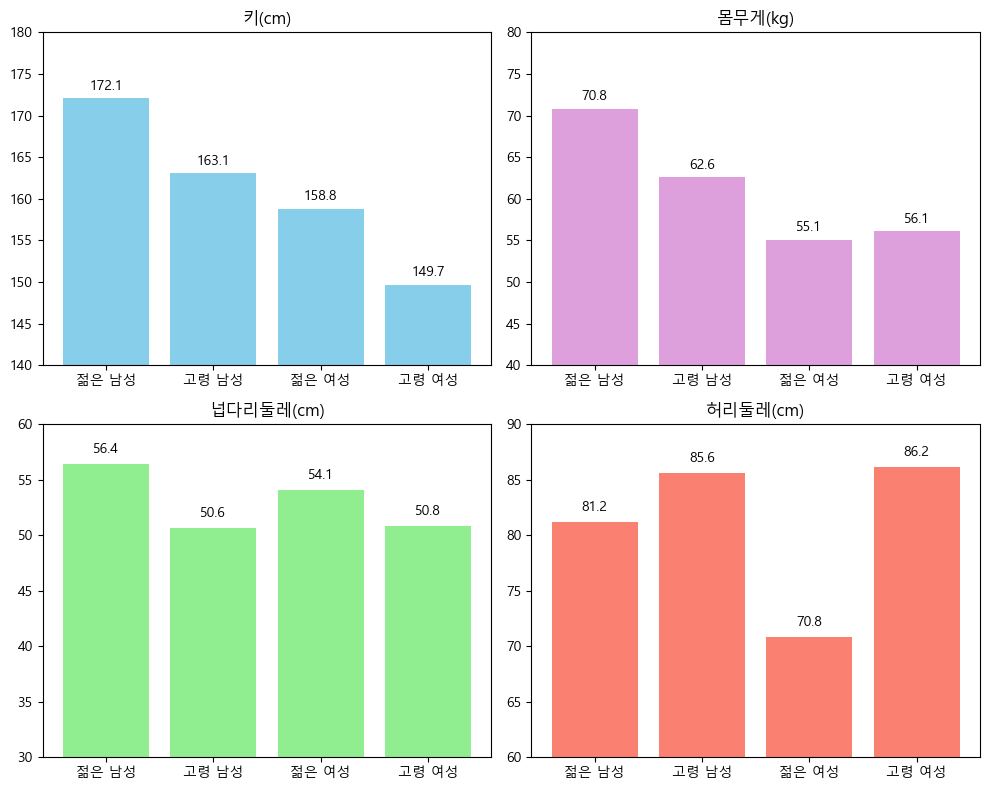

In [39]:
height = [
    young_man_df['키'].mean() / 10,
    old_man_df['키'].mean() / 10,
    young_woman_df['키'].mean() / 10,
    old_woman_df['키'].mean() / 10
]

weight = [
    young_man_df['몸무게'].mean(),
    old_man_df['몸무게'].mean(),
    young_woman_df['몸무게'].mean(),
    old_woman_df['몸무게'].mean()
]

leg_means = [
    young_man_df['넙다리둘레'].mean() / 10,
    old_man_df['넙다리둘레'].mean() / 10,
    young_woman_df['넙다리둘레'].mean() / 10,
    old_woman_df['넙다리둘레'].mean() / 10
]

waist_means = [
    young_man_df['허리둘레'].mean() / 10,
    old_man_df['허리둘레'].mean() / 10,
    young_woman_df['허리둘레'].mean() / 10,
    old_woman_df['허리둘레'].mean() / 10
]

labels = ['젊은 남성', '고령 남성', '젊은 여성', '고령 여성']

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('키(cm)')
plt.ylim(140, 180)
bars = plt.bar(labels, height, color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, f'{bar.get_height():.1f}', ha = 'center')


plt.subplot(2,2,2)
plt.title('몸무게(kg)')
plt.ylim(40, 80)
bars = plt.bar(labels, weight, color='plum')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, f'{bar.get_height():.1f}', ha = 'center')

plt.subplot(2,2,3)
plt.title('넙다리둘레(cm)')
plt.ylim(30, 60)
bars = plt.bar(labels, arm_means, color='lightgreen')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, f'{bar.get_height():.1f}', ha = 'center')

plt.subplot(2,2,4)
plt.title('허리둘레(cm)')
plt.ylim(60, 90)
bars = plt.bar(labels, waist_means,  color='salmon')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +1, f'{bar.get_height():.1f}', ha = 'center')

plt.tight_layout()
plt.show()

In [ ]:
[노화에 따른 신체 변화] 
    1. 키 감소 
    2. 근육량 감소
    3. 남성-체중감소, 여성-체중증가 
    4. 복부 비만

## 1. 노인 침대 분석

### 1-1 침대 높이 분석

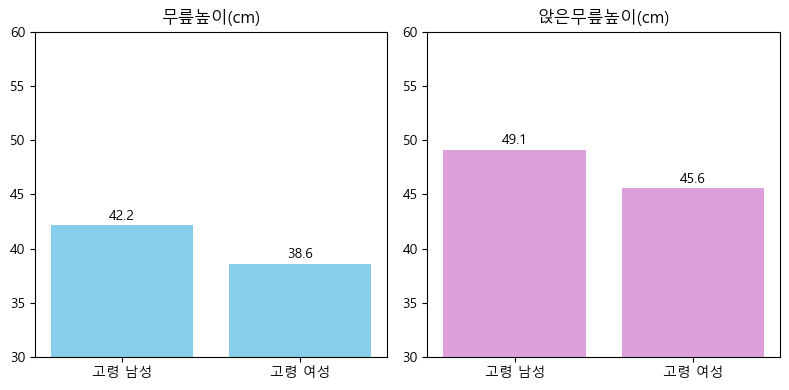

In [16]:
knee_heights = [
    old_man_df['무릎높이'].mean() / 10,
    old_woman_df['무릎높이'].mean() / 10
]

sitting_knee_heights = [
    old_man_df['앉은무릎높이'].mean() / 10,
    old_woman_df['앉은무릎높이'].mean() / 10
]

labels = ['고령 남성', '고령 여성']

plt.figure(figsize=(8, 4))

#무릎높이
plt.subplot(1, 2, 1)
plt.title('무릎높이(cm)')
plt.ylim(30, 60)
bars = plt.bar(labels, knee_heights, color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', ha='center')

#앉은무릎높이
plt.subplot(1, 2, 2)
plt.title('앉은무릎높이(cm)')
plt.ylim(30, 60)
bars = plt.bar(labels, sitting_knee_heights, color='plum')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{bar.get_height():.1f}', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
[1-1 침대 높이 분석]
무릎높이 -> 너무 높으면 발이 땅에 안 닿음
앉은 무릎 높이 -> 너무 낮으면 무릎이 올라가 허리 통증
    => 침대 높이 : 무릎높이 ~ 앉은무릎높이 사이
        => 고령남성 : 43 ~ 48 cm
        => 고령여성 : 39 ~ 45 cm

### 1-2 침대 길이 분석

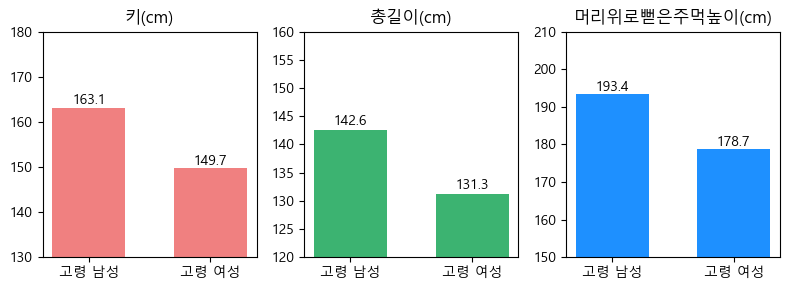

In [30]:
heights = [
    old_man_df['키'].mean() / 10,
    old_woman_df['키'].mean() / 10
]

total_lengths = [
    old_man_df['총길이'].mean() / 10,
    old_woman_df['총길이'].mean() / 10
]

reach_heights = [
    old_man_df['머리위로뻗은주먹높이'].mean() / 10,
    old_woman_df['머리위로뻗은주먹높이'].mean() / 10
]

labels = ['고령 남성', '고령 여성']

plt.figure(figsize=(8, 3))

# 키
plt.subplot(1, 3, 1)
plt.title('키(cm)')
plt.ylim(130, 180)
bars = plt.bar(labels, heights, color='lightcoral', width=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8, f'{bar.get_height():.1f}', ha='center')

# 총길이
plt.subplot(1, 3, 2)
plt.title('총길이(cm)')
plt.ylim(120, 160)
bars = plt.bar(labels, total_lengths, color='mediumseagreen', width=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8, f'{bar.get_height():.1f}', ha='center')

# 머리위로뻗은주먹높이
plt.subplot(1, 3, 3)
plt.title('머리위로뻗은주먹높이(cm)')
plt.ylim(150, 210)
bars = plt.bar(labels, reach_heights, color='dodgerblue', width=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8, f'{bar.get_height():.1f}', ha='center')

plt.tight_layout()
plt.show()

In [41]:
[1-2 침대 길이 분석]
    키 -> 우리가 아는 키
    총길이(누운상태길이) -> 누웠을 때 길이
    머리위로뻗은주먹높이 -> 누운 상태에서 팔을 뻗었을 때 길이

    => 침대 길이 : 키 + (10~20cm) 이상
        => 고령남성 : 163.1 + 15cm -> 최소 180cm (머리 뻗은 길이 고려시 195cm 이상)
        => 고령여성 : 149.7 + 15cm -> 최소 165cm (머리 뻗은 길이 고려시 180cm 이상)

### 1-3 침대 너비 분석

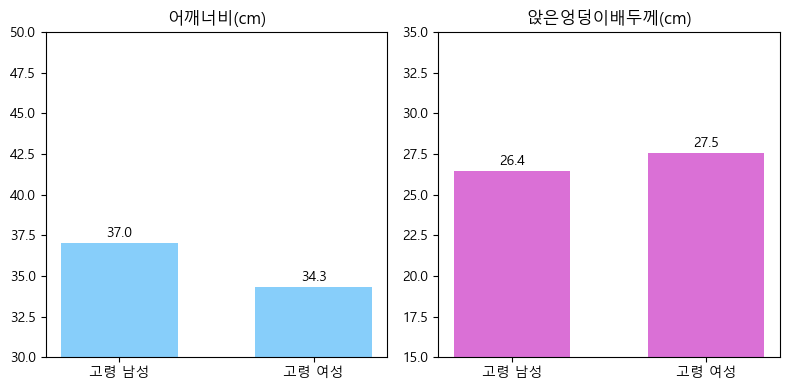

In [47]:
shoulder_widths = [
    old_man_df['어깨너비'].mean() / 10,
    old_woman_df['어깨너비'].mean() / 10
]

hip_abdomen_depths = [
    old_man_df['앉은엉덩이배두께'].mean() / 10,
    old_woman_df['앉은엉덩이배두께'].mean() / 10
]

labels = ['고령 남성', '고령 여성']

plt.figure(figsize=(8, 4))  

# 어깨너비
plt.subplot(1, 2, 1)
plt.title('어깨너비(cm)')
plt.ylim(30, 50)
bars = plt.bar(labels, shoulder_widths, color='lightskyblue', width=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4, f'{bar.get_height():.1f}', ha='center')

# 앉은엉덩이배두께
plt.subplot(1, 2, 2)
plt.title('앉은엉덩이배두께(cm)')
plt.ylim(15, 35)
bars = plt.bar(labels, hip_abdomen_depths, color='orchid', width=0.6)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4, f'{bar.get_height():.1f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
[1-3 침대 너비 분석]
    어깨너비 
    앉은엉덩이배두께 -> 엉덩이~배까지의 수직 둘레

   => 침대 너비 : 어깨너비+20cm(최소) / 어깨너비+30~40cm(편한 수면)
        => 고령남성 : 37 + 20~40cm ->  60~80cm
        => 고령여성 : 34.3 + 20~40cm -> 55~75cm

# 노인 신체 치수 기반 침대 설계

## [1-1 침대 높이]
  고령남성 : 43 ~ 48 cm  
  고령여성 : 39 ~ 45 cm

## [1-2 침대 길이]
  고령남성 : 163.1 + 15cm → 최소 180cm (머리 뻗은 길이 고려 시 195cm 이상)  
  고령여성 : 149.7 + 15cm → 최소 165cm (머리 뻗은 길이 고려 시 180cm 이상)

## [1-3 침대 너비]
  고령남성 : 37.0 + 20 ~ 40cm → 60 ~ 80 cm  
  고령여성 : 34.3 + 20 ~ 40cm → 55 ~ 75 cm